In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.shape

(891, 15)

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df['pclass'].unique()

array([3, 1, 2])

In [6]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [7]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

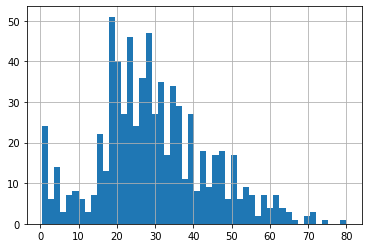

In [9]:
df['age'].hist(bins=50)

## Data Pre-Processing

In [10]:
subset = df[['pclass','sex','age','survived']].copy()
subset.dropna(inplace=True)

In [11]:
X = subset[['pclass','sex','age']].copy()

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [13]:
X['sex'] = le.fit_transform(subset['sex'])

In [14]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [15]:
X.shape

(714, 3)

In [16]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int64  
 2   age     714 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 22.3 KB


In [18]:
y = subset['survived'].copy()

In [19]:
y.value_counts()

0    424
1    290
Name: survived, dtype: int64

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_train)
  if train:
    res = clf.predict(X_train)
    print("Train Result:\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, res)))
    print("Classification Report: \n {}\n".format(classification_report(y_train, res)))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, res)))
    print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))
    res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print('Average Accuracy: \t {0:.4f}'.format(np.mean(res)))
    print('Accuracy SD: \t\t {0:.4f}'.format(np.std(res)))
  elif train == False:
    res_test = clf.predict(X_test)
    print("Test Result:\n")
    print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, res_test)))
    print("Classification Report: \n {}\n".format(classification_report(y_test, res_test)))
    print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, res_test)))
    print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), lb.transform(res_test))))


In [34]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [35]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [37]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)
print("\n-----------------------------------------------")
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8956

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       385
           1       0.90      0.83      0.86       257

    accuracy                           0.90       642
   macro avg       0.90      0.88      0.89       642
weighted avg       0.90      0.90      0.89       642


Confusion Matrix: 
 [[362  23]
 [ 44 213]]

ROC AUC: 0.8845

Average Accuracy: 	 0.8020
Accuracy SD: 		 0.0699

-----------------------------------------------
Test Result:

accuracy score: 0.8472

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        39
           1       0.82      0.85      0.84        33

    accuracy                           0.85        72
   macro avg       0.85      0.85      0.85        72
weighted avg       0.85      0.85      0.85        72


Confusion Matrix: 
 [[33  6]
 [ 5 28]]

ROC AUC: 0.8473



## Grid Search

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [39]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [40]:
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2,3,10],
               "min_samples_leaf":[1,3,10],
               "bootstrap":[True,False],
               "criterion":['gini', 'entropy']}

In [41]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, verbose=1, scoring='accuracy',iid=False)

In [43]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   43.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [44]:
grid_search.best_score_

0.8098837209302324

In [45]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [46]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=True)
print("\n-----------------------------------------------")
print_score(grid_search, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8162

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       385
           1       0.92      0.60      0.72       257

    accuracy                           0.82       642
   macro avg       0.85      0.78      0.79       642
weighted avg       0.84      0.82      0.81       642


Confusion Matrix: 
 [[371  14]
 [104 153]]

ROC AUC: 0.7795

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   44.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.0s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.1s


Average Accuracy: 	 0.8129
Accuracy SD: 		 0.0701

-----------------------------------------------
Test Result:

accuracy score: 0.8472

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        39
           1       0.92      0.73      0.81        33

    accuracy                           0.85        72
   macro avg       0.86      0.84      0.84        72
weighted avg       0.86      0.85      0.84        72


Confusion Matrix: 
 [[37  2]
 [ 9 24]]

ROC AUC: 0.8380



[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   42.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


# Extra Trees (Extremely Randmoized Trees) Ensemble

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
xt_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [49]:
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [50]:
print_score(xt_clf, X_train, X_test, y_train, y_test, train=True)
print("\n-----------------------------------------------")
print_score(xt_clf, X_train, X_test, y_train, y_test, train=False)

Train Result:

accuracy score: 0.8956

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       385
           1       0.95      0.78      0.86       257

    accuracy                           0.90       642
   macro avg       0.91      0.88      0.89       642
weighted avg       0.90      0.90      0.89       642


Confusion Matrix: 
 [[374  11]
 [ 56 201]]

ROC AUC: 0.8768

Average Accuracy: 	 0.7989
Accuracy SD: 		 0.0704

-----------------------------------------------
Test Result:

accuracy score: 0.8611

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.88        39
           1       0.87      0.82      0.84        33

    accuracy                           0.86        72
   macro avg       0.86      0.86      0.86        72
weighted avg       0.86      0.86      0.86        72


Confusion Matrix: 
 [[35  4]
 [ 6 27]]

ROC AUC: 0.8578

